In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('review.csv')
df.shape

(50000, 2)

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Text Cleaning

In [4]:
#sample of random 2000 rows
df=df.sample(2000)
df.shape

(2000, 2)

In [5]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
15998,Seriously - avoid this movie at any cost. I ju...,0
4568,The first step to getting off of that road tha...,1
6173,"Leslie Sands' stilted play ""Deadlock"" becomes ...",0
3441,The Impossible Planet and The Satan Pit togeth...,1
10522,Reanhauer (Bill Roy) is the leader of a desert...,1


In [6]:
df.iloc[1].review

"The first step to getting off of that road that leads to nowhere is recognizing that you're on it in the first place; then it becomes a matter of being assertive and taking positive steps to overcome the negative influences in your life that may have put you on that road to begin with. Which is exactly what a young Latino girl does in `Girlfight,' written and directed by Karyn Kusama. Diana (Michelle Rodriguez) is an eighteen-year-old High School senior from the projects in Brooklyn, facing expulsion after her fourth fight in the halls since the beginning of the semester. She affects a `whatever' attitude which masks a deep-seated anger that threatens to take her into places she'd rather not go. She lives with her father, Sandro (Paul Calderon), with whom she has a very tentative relationship, and her younger brother, Tiny (Ray Santiago). With her life teetering on the brink of dissolution, she desperately needs an outlet through which to channel the demons that plague her. And one da

In [7]:
#removing html tags
import re
clean = re.compile('<.*?>')
re.sub(clean,'',df.iloc[1].review)

"The first step to getting off of that road that leads to nowhere is recognizing that you're on it in the first place; then it becomes a matter of being assertive and taking positive steps to overcome the negative influences in your life that may have put you on that road to begin with. Which is exactly what a young Latino girl does in `Girlfight,' written and directed by Karyn Kusama. Diana (Michelle Rodriguez) is an eighteen-year-old High School senior from the projects in Brooklyn, facing expulsion after her fourth fight in the halls since the beginning of the semester. She affects a `whatever' attitude which masks a deep-seated anger that threatens to take her into places she'd rather not go. She lives with her father, Sandro (Paul Calderon), with whom she has a very tentative relationship, and her younger brother, Tiny (Ray Santiago). With her life teetering on the brink of dissolution, she desperately needs an outlet through which to channel the demons that plague her. And one da

In [8]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [9]:
df['review'] = df['review'].apply(clean_html)

In [10]:
#convert to lowercase
def conv_low(text):
    return text.lower()

In [11]:
df['review'] = df['review'].apply(conv_low)

In [12]:
#remove special characters
def rem_special(text):
    x = ''
    for i in text:
        if i.isalnum(): #check if "i" is alpha numeric 
            x = x + i
        else:
            x = x + ' '
    return x

In [13]:
rem_special('t@he $$ king i&*n the north')

't he    king i  n the north'

In [14]:
df['review'] = df['review'].apply(rem_special)
df1 = df

In [15]:
#remove stop word (words like: and, a, if)
import nltk

In [16]:
from nltk.corpus import stopwords #stopwords is a class

In [17]:
def rem_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y = x[:]
    x.clear()
    return y

In [18]:
df1['review'] = df1['review'].apply(rem_stopwords)
df2 = df1
df2

,review,sentiment
15998,"[seriously, avoid, movie, cost, saw, first, sn...",0
4568,"[first, step, getting, road, leads, nowhere, r...",1
6173,"[leslie, sands, stilted, play, deadlock, becom...",0
3441,"[impossible, planet, satan, pit, together, com...",1
10522,"[reanhauer, bill, roy, leader, desert, dwellin...",1
...,...,...
27400,"[george, sanders, playing, saint, penultimate,...",1
7418,"[rarely, annoyed, leading, performance, ali, m...",0
21321,"[personally, agree, stephen, 12, indulge, real...",1
37999,"[possibly, say, show, magnitude, sopranos, lit...",1


In [19]:
#perform stemming (convert v1,v3,v4,v5 to v2)
from nltk.stem import WordNetLemmatizer, PorterStemmer
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [20]:

def stem_words(text):
    y = []
    for i in text:
        y.append(wnl.lemmatize(i) if wnl.lemmatize(i).endswith('e') else ps.stem(i))
    z = y[:]
    y.clear()
    return z

In [21]:
lists =['i','loved','loving','it']
stem_words(lists)

['i', 'love', 'love', 'it']

In [22]:
df2['review'] = df2['review'].apply(stem_words)
df3 = df2
df3

,review,sentiment
15998,"[serious, avoid, movie, cost, saw, first, snea...",0
4568,"[first, step, get, road, lead, nowhere, recogn...",1
6173,"[leslie, sand, stilt, play, deadlock, becom, p...",0
3441,"[impossible, planet, satan, pit, togeth, compr...",1
10522,"[reanhauer, bill, roy, leader, desert, dwell, ...",1
...,...,...
27400,"[george, sander, play, saint, penultimate, tim...",1
7418,"[rare, annoy, lead, performance, ali, mcgraw, ...",0
21321,"[person, agree, stephen, 12, indulge, realli, ...",1
37999,"[possibl, say, show, magnitude, soprano, liter...",1


In [23]:
df3['review'] = [','.join(map(str, l)) for l in df3['review']] #convert list to string
df4 = df3
df4

,review,sentiment
15998,"serious,avoid,movie,cost,saw,first,sneak,previ...",0
4568,"first,step,get,road,lead,nowhere,recogn,first,...",1
6173,"leslie,sand,stilt,play,deadlock,becom,poor,cho...",0
3441,"impossible,planet,satan,pit,togeth,comprise,tw...",1
10522,"reanhauer,bill,roy,leader,desert,dwell,cult,tr...",1
...,...,...
27400,"george,sander,play,saint,penultimate,time,good...",1
7418,"rare,annoy,lead,performance,ali,mcgraw,movie,g...",0
21321,"person,agree,stephen,12,indulge,realli,point,t...",1
37999,"possibl,say,show,magnitude,soprano,liter,redef...",1


### Create Bag of words

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

In [25]:
X = cv.fit_transform(df4['review']).toarray() #2000 reviews ma 18k word haru ko term frequency compute garera matrix generate
pickle.dump(cv, open('tranform.pkl', 'wb'))

In [26]:
X.shape

(2000, 18938)

In [27]:
y = df4.iloc[:,-1].values # y -> sentiment
y.shape

(2000,)

### Training and testing data

In [28]:
#taking X,y and spliting in training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(X)

(1600, 18938) (400, 18938) (1600,) (400,)


,0,1,2,3,4,5,6,7,8,9,...,18928,18929,18930,18931,18932,18933,18934,18935,18936,18937
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.084508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [31]:
clf1 = GaussianNB()
clf2 = MultinomialNB()

In [32]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [33]:
y_test.shape, y_pred1.shape, y_pred2.shape

((400,), (400,), (400,))

### Testing accuracy

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print("GaussianNB has an accuracy of ",accuracy_score(y_test,y_pred1)*100,"%")
print("MultinomialNB has an accuracy of ",accuracy_score(y_test,y_pred2)*100,"%")

GaussianNB has an accuracy of  61.25000000000001 %
MultinomialNB has an accuracy of  81.5 %


In [36]:
filename = 'nlp_model.pkl'
pickle.dump(clf2, open(filename, 'wb'))

In [77]:
import matplotlib.pyplot as plt
import itertools

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       207
           1       0.80      0.82      0.81       193

    accuracy                           0.81       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.81      0.82       400

Confusion matrix, without normalization
[[167  40]
 [ 34 159]]


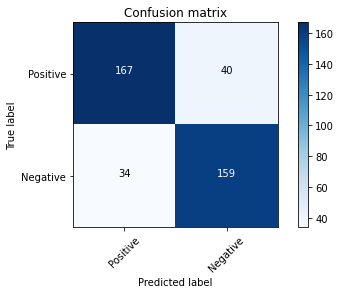

In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


cnf_matrix = confusion_matrix(y_test, y_pred2, labels =[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize= False,title='Confusion matrix')